# Binary Class Classification
This Jupyter Notebook takes binary text data and classifies them.

Following models are used to classify, and the performance metrics are used to visualize each model's performance:
- `scikit-learn` Models:
    - Logistic Regression
    - Naive Bayes
    - SVM (Support Vector Machine)
    - Gradient Boosting
- CNN (Convolutional Neural Network) Model

## 0. Import Libraries

In [1]:
import pandas as pd
from utils import *
from sklearn_model import *
from cnn_model import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/jiwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jiwon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jiwon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jiwon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jiwon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Data Preprocessing
Note that the [Disaster Tweets](https://www.kaggle.com/datasets/vstepanenko/disaster-tweets) dataset from [Kaggle](https://www.kaggle.com) is used for this demo.

If there is an encoding issue with your BYOD, refer to the following encoding options: https://stackoverflow.com/a/45530363

In [2]:
df = pd.read_csv('data/tweets.csv', encoding='utf-8') # read *.csv dataset into pandas dataframe

df, le_name_mapping = encode_label(df) # encode text labeled category
print(le_name_mapping) # print out the mapping status (i.e. "Spam" falls under '0')

df['clean_text'] = df['text'].apply(lambda x: text_preprocess(x)) # preprocess text data
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["target"], test_size=0.2, shuffle=True) # 8:2 = train:test set split = d

{0: 0, 1: 1}


## 2. EDA (Exploratory Data Analysis)
In this step, the input text data is getting analyzed.

Following information will be displayed:
- Data distribution per label
- Word count for each label
- Character count for each label
- Unique word count for each label

Data Distribution Per Label
0    9256
1    2114
Name: target, dtype: int64


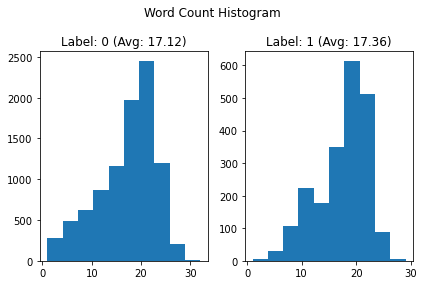

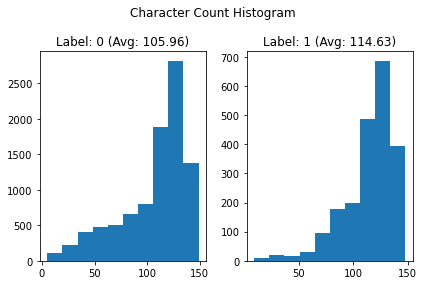

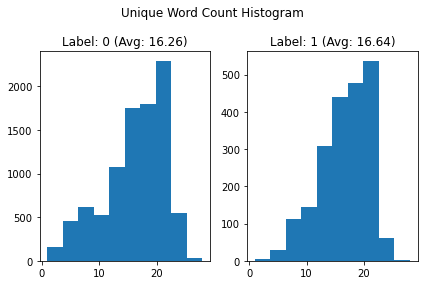

In [3]:
print("Data Distribution Per Label")
print(df['target'].value_counts())
word_count(df).show()
char_count(df).show()
unique_word_count(df).show()

## 3. TF-IDF
TF-IDF vectorize is required for scikit-learn models are required.

In [4]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=False, stop_words='english')
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) # tfidf runs on non-tokenized sentences
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) # no fit/train for test data, only transform

## 4. Scikit-Learn Model
Following models are getting trained and make predictions:
- Logistic Regression
- Naive Bayes
- SVM (Support Vector Machine)
- Gradient Boosting

ROC Curve is additionally plotted for the performance measurement purposes.

Model:	 Logistic Regression
Train:	 0.0432 seconds
Predict: 0.0002 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1871
           1       0.81      0.33      0.47       403

    accuracy                           0.87      2274
   macro avg       0.84      0.66      0.70      2274
weighted avg       0.86      0.87      0.84      2274



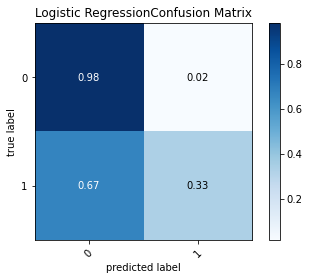

Model:	 Naive Bayes
Train:	 0.0017 seconds
Predict: 0.0002 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1871
           1       1.00      0.19      0.31       403

    accuracy                           0.86      2274
   macro avg       0.93      0.59      0.62      2274
weighted avg       0.88      0.86      0.81      2274



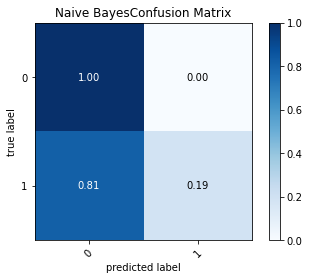

Model:	 SVM
Train:	 25.1556 seconds
Predict: 0.8322 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1871
           1       0.87      0.43      0.58       403

    accuracy                           0.89      2274
   macro avg       0.88      0.71      0.76      2274
weighted avg       0.89      0.89      0.87      2274



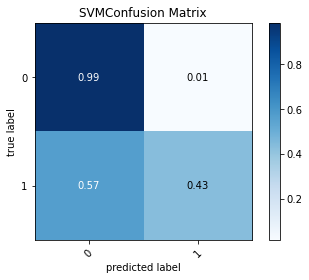

Model:	 Gradient Boosting
Train:	 1.5748 seconds
Predict: 0.0017 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1871
           1       0.79      0.23      0.36       403

    accuracy                           0.85      2274
   macro avg       0.83      0.61      0.64      2274
weighted avg       0.85      0.85      0.82      2274



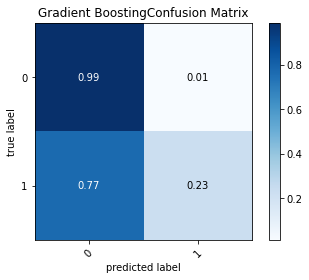

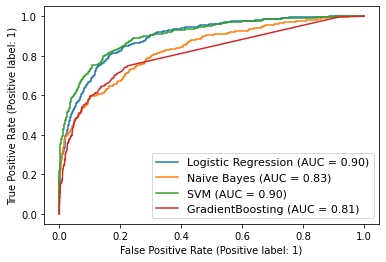

In [5]:
lg_model = Logistic(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
lg_model.runner()

nb_model = NaiveBayes(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
nb_model.runner()

svm_model = SVM(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
svm_model.runner()

gb_model = GradientBoosting(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
gb_model.runner()

sklearn_roc_curve(y_test, [lg_model.y_prob, nb_model.y_prob, svm_model.y_prob, gb_model.y_prob], 
                ['Logistic Regression', 'Naive Bayes', 'SVM', 'GradientBoosting']).show()

## 5. CNN (Convolutional Neural Network) Model

2022-04-30 22:24:49.157968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 22:24:49.184272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 22:24:49.184423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 22:24:49.184979: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Virtual devices cannot be modified after being initialized
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 32, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 250)               128250    
                                                                 
 dense_1 (Dense)             (None, 1)                 251     

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-04-30 22:24:51.745195: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-04-30 22:24:54.252117: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Train:	 29.1549 seconds
Predict: 0.2192 seconds
Accuracy: 87.16%
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1871
           1       0.64      0.62      0.63       403

    accuracy                           0.87      2274
   macro avg       0.78      0.77      0.78      2274
weighted avg       0.87      0.87      0.87      2274



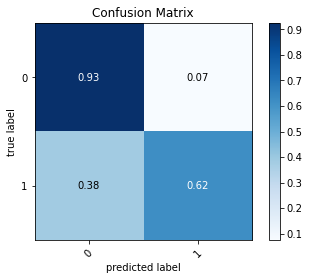

In [6]:
max_words = get_max_words(df)
num_class = len(le_name_mapping)
cnn_model = CNNBinary(X_train, y_train, X_test, y_test, max_words, num_class)
cnn_model.runner()